# LBS Descriptives

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import plotly.plotly
import plotly.tools as tls
import plotly.graph_objs as go

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import datetime as dt
import time

In [3]:
from Utils import TransantiagoConstants
from Utils import ReadTurnstilesDataBase

In [4]:
def mergeTurnstileDatabase(lbs_df, ana_turnstile_df, mauricio_turnstile_df):
    lbs_df = lbs_df.merge(ana_turnstiles_df, left_on = 'LBS.[Patente]', right_on = 'sitio_subida', how='left')
    lbs_df = lbs_df.merge(mauricio_turnstiles_df, left_on = 'LBS.[Patente]', right_on = 'sitio_subida' , suffixes=('_ana', '_mauricio'), how='left')
    torniquetes_mariposa_conditions = (lbs_df.loc[:,'fecha_instalacion_ana'].dt.date<lbs_df.loc[:,'Fecha'])

    lbs_df['min_fecha'] = pd.concat([lbs_df['fecha_instalacion_ana'], lbs_df['fecha_instalacion_mauricio']], axis=1).min(axis=1)
    no_torniquetes_conditions = (((lbs_df.loc[:,'fecha_instalacion_ana'].isnull()) & (lbs_df.loc[:,'fecha_instalacion_mauricio'].isnull())) | (lbs_df.loc[:,'Fecha']<=lbs_df['min_fecha'].dt.date))

    lbs_df.loc[:,'torniquete_mariposa'] = np.where(torniquetes_mariposa_conditions,1,0)
    lbs_df.loc[:,'no_torniquete'] = np.where(no_torniquetes_conditions,1,0)
    
    return lbs_df

In [5]:
month_list = ['01 Enero 2017',
              '02 Febrero 2017',
              '03 Marzo 2017',
              '04 Abril 2017',
              '05 Mayo 2017',
              '06 Junio 2017',
              '07 Julio 2017',
              '08 Agosto 2017',
              '09 Septiembre 2017',
              '10 Octubre 2017',
              '11 Noviembre 2017',
              '12 Diciembre 2017']

name_list = ['LBS Enero-2017',
             'LBS Febrero-2017',
             'LBS Marzo-2017',
             'LBS Abril-2017',
             'LBS Mayo-2017',
             'LBS Junio-2017',
             'LBS Julio-2017',
             'LBS Agosto-2017',
             'LBS SEP-2017',
             'LBS OCT-2017',
             'LBS NOV-2017',
             'LBS DIC-2017']

In [6]:
month = month_list[11]
name = name_list[11]

In [7]:
lbs_path = 'G:/LeoCamus/0_LBS/2017/' +  month + '/' + name + '.csv'
lbs_df = pd.read_csv(lbs_path, sep=';', encoding='latin-1') #Dates and times are not parsed 
lbs_df = lbs_df.drop(['Unnamed: 11'], axis=1)

lbs_df.loc[:,'Tiempo_Expedicion'] = pd.to_datetime(lbs_df.loc[:,'LBS.[Tiempo (hh:mm:ss)]'], format='%Y-%m-%d %H:%M:%S').dt.time
lbs_df.loc[:,'Tiempo_Expedicion_secs'] = lbs_df.loc[:,'Tiempo_Expedicion'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

lbs_df.loc[:,'Media_hora'] = pd.to_datetime(lbs_df.loc[:,'LBS.[Cada media Hora]'], format='%Y-%m-%d %H:%M:%S').dt.time

lbs_df.loc[:,'Fecha'] = pd.to_datetime(lbs_df.loc[:,'LBS.[Fecha]'], format='%d/%m/%Y').dt.date

In [8]:
lbs_df.loc[:,'ser_sen'] = lbs_df.loc[:,'LBS.[Servicio]'] + lbs_df.loc[:,'LBS.[Sentido]'].apply(lambda x: x[:1])

In [9]:
lbs_df.head()

,LBS.[UN],LBS.[Servicio],LBS.[Patente],LBS.[Sentido],LBS.[Distancia (m)],LBS.[Tiempo (hh:mm:ss)],LBS.[Capacidad (#)],LBS.[Estado],LBS.[Fecha],LBS.[Período],LBS.[Cada media Hora],Tiempo_Expedicion,Tiempo_Expedicion_secs,Media_hora,Fecha,ser_sen
0,U1,101,ZN-4102,Ida,24640.0,1899-12-30 00:55:00,91.0,OK,01/12/2017,01 - Pre Nocturno,1899-12-30 00:00:00,00:55:00,3300,00:00:00,2017-12-01,101I
1,U1,101,ZN-3950,Ida,24640.0,1899-12-30 00:44:00,91.0,OK,01/12/2017,01 - Pre Nocturno,1899-12-30 00:00:00,00:44:00,2640,00:00:00,2017-12-01,101I
2,U1,101,ZN-5077,Ida,24640.0,1899-12-30 00:51:00,91.0,OK,01/12/2017,01 - Pre Nocturno,1899-12-30 00:30:00,00:51:00,3060,00:30:00,2017-12-01,101I
3,U1,101,ZN-6160,Ida,24640.0,1899-12-30 01:15:00,160.0,OK,01/12/2017,03 - Transición Nocturno,1899-12-30 05:30:00,01:15:00,4500,05:30:00,2017-12-01,101I
4,U1,101,ZN-6457,Ida,24640.0,1899-12-30 01:06:31,163.0,OK,01/12/2017,03 - Transición Nocturno,1899-12-30 05:30:00,01:06:31,3991,05:30:00,2017-12-01,101I


In [38]:
lbs_df.loc[lbs_df['ser_sen']=='B14I','LBS.[Período]'].unique()

array(['01 - Pre Nocturno', '02 - Nocturno', '03 - Transición Nocturno',
       '04 - Punta Mañana', '05 - Transición Punta Mañana',
       '06 - Fuera de Punta Mañana', '07 - Punta Mediodía',
       '08 - Fuera de Punta Tarde', '09 - Punta Tarde',
       '10 - Transición Punta Tarde', '11 - Fuera de Punta Nocturno',
       '12 - Pre Nocturno', '13 - Pre Nocturno Sábado',
       '14 - Nocturno Sábado', '15 - Transición Sábado Mañana',
       '16 - Punta Mañana Sábado', '17 - Mañana Sábado',
       '18 - Punta Mediodía Sábado', '19 - Tarde Sábado',
       '20 - Transición Sábado Nocturno', '21 - Pre Nocturno Sábado',
       '22 - Pre Nocturno Domingo', '23 - Nocturno Domingo',
       '24 - Transición Domingo Mañana', '25 - Mañana Domingo',
       '26 - Mediodía Domingo', '27 - Tarde Domingo',
       '28 - Transición Domingo Nocturno', '29 - Pre Nocturno Domingo'], dtype=object)

In [10]:
[ana_turnstiles_df, mauricio_turnstiles_df] = ReadTurnstilesDataBase.readTurnstileData()
ana_turnstiles_df = ReadTurnstilesDataBase.processAnaTurnstiles(ana_turnstiles_df)

In [11]:
lbs_df = mergeTurnstileDatabase(lbs_df,ana_turnstiles_df,mauricio_turnstiles_df)

In [12]:
lbs_no_turnstile = lbs_df.loc[lbs_df['no_torniquete']==1,:]
lbs_butterfly_turnstile = lbs_df.loc[lbs_df['torniquete_mariposa']==1,:]

In [13]:
len(lbs_no_turnstile.index)

997852

In [14]:
len(lbs_butterfly_turnstile.index)

722618

In [15]:
unique_turnstile_services = lbs_butterfly_turnstile.loc[:,'ser_sen'].unique()

In [17]:
lbs_no_turnstile_seen_in_turnstile = lbs_no_turnstile.loc[lbs_no_turnstile['ser_sen'].isin(unique_turnstile_services),:]

In [18]:
len(lbs_no_turnstile_seen_in_turnstile.index)

868173

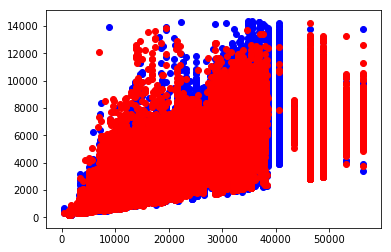

In [19]:
fig, ax = plt.subplots()
ax.scatter(lbs_no_turnstile_seen_in_turnstile['LBS.[Distancia (m)]'].values, lbs_no_turnstile_seen_in_turnstile['Tiempo_Expedicion_secs'].values, color='blue')
ax.scatter(lbs_butterfly_turnstile['LBS.[Distancia (m)]'].values, lbs_butterfly_turnstile['Tiempo_Expedicion_secs'].values, color='red')


In [39]:
B14I_turnstile = lbs_butterfly_turnstile.loc[(lbs_butterfly_turnstile['ser_sen']=='B14I') & (lbs_butterfly_turnstile['LBS.[Período]']=='04 - Punta Mañana'),:]
B14I_no_turnstile = lbs_no_turnstile.loc[(lbs_no_turnstile['ser_sen'] == 'B14I') & (lbs_no_turnstile['LBS.[Período]']=='04 - Punta Mañana'),:]

In [40]:
len(B14I_turnstile.index)

140

In [41]:
len(B14I_no_turnstile.index)

82

In [42]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

In [43]:
B14I_turnstile_time = B14I_turnstile['Tiempo_Expedicion_secs'].values
B14I_no_turnstile_time = B14I_no_turnstile['Tiempo_Expedicion_secs'].values

max_time = max(max(B14I_turnstile_time),max(B14I_no_turnstile_time))

bins = range(0,int(max_time),200)

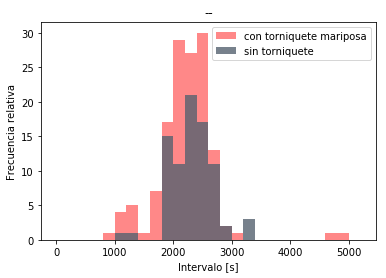

In [45]:
hist_fig, ax = plt.subplots()

plot1 = ax.hist(B14I_turnstile_time,bins=bins,color=colors[3], alpha=0.8, label='con torniquete mariposa')
plot2 = ax.hist(B14I_no_turnstile_time,bins=bins,color=colors[0], alpha = 0.8, label='sin torniquete')


ax.set_title('--')
ax.set_xlabel('Intervalo [s]')
ax.set_ylabel('Frecuencia relativa')
#ax.set_xlim(0,30)
ax.legend()